<a href="https://colab.research.google.com/github/dsaijay/ds6010_assgn2/blob/master/Copy_of_Drowsiness_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_folder = "/content/drive/MyDrive/train/"
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/haarcascade_frontalface_default.xml")
categories = ["yawn", "no_yawn"]

In [4]:
yawn = []
for category in categories:
  images_folder = train_folder+"/"+category
  for img in os.listdir(images_folder):
    image_array = cv2.imread(images_folder+"/"+img, cv2.COLOR_BGR2RGB)
    resized_array = cv2.resize(image_array, (256, 256))
    yawn.append([resized_array, category])
yawn = np.array(yawn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [5]:
X = []
y = []
for feature, label in yawn:
    X.append(feature)
    y.append(label)
X = np.array(X)
X = X.reshape(-1, 256, 256, 3)
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
y = np.array(y)

In [7]:
from sklearn.model_selection import train_test_split
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=42)

In [11]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [8]:
X_train.shape[1:]

(256, 256, 3)

In [9]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="sigmoid"))
opt = Ada
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"], optimizer=)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        36896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [53]:
''' model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(145, 145, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) '''

" model = Sequential()\nmodel.add(Conv2D(128, (3, 3), activation='relu', input_shape=(145, 145, 3)))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(2))\nmodel.summary()\nmodel.compile(optimizer='adam',\n              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\n              metrics=['accuracy']) "

In [12]:
history = model.fit(train_generator, epochs=25, validation_data=test_generator,validation_steps=len(test_generator))

Epoch 1/25
32/32 [==============================] - 54s 1s/step - loss: 0.7011 - accuracy: 0.3643 - val_loss: 0.6284 - val_accuracy: 0.7057
Epoch 2/25
32/32 [==============================] - 28s 852ms/step - loss: 0.6336 - accuracy: 0.4965 - val_loss: 0.6511 - val_accuracy: 0.4276
Epoch 3/25
32/32 [==============================] - 28s 851ms/step - loss: 0.6135 - accuracy: 0.6594 - val_loss: 0.6219 - val_accuracy: 0.7862
Epoch 4/25
32/32 [==============================] - 27s 844ms/step - loss: 0.5972 - accuracy: 0.7157 - val_loss: 0.5958 - val_accuracy: 0.5448
Epoch 5/25
32/32 [==============================] - 27s 842ms/step - loss: 0.6111 - accuracy: 0.7354 - val_loss: 0.5838 - val_accuracy: 0.7241
Epoch 6/25
32/32 [==============================] - 28s 850ms/step - loss: 0.5964 - accuracy: 0.7315 - val_loss: 0.6075 - val_accuracy: 0.3793
Epoch 7/25
32/32 [==============================] - 28s 853ms/step - loss: 0.5889 - accuracy: 0.7295 - val_loss: 0.5573 - val_accuracy: 0.7701
Ep

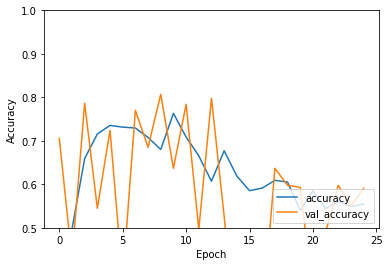

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [14]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

14/14 - 4s - loss: 156.4913 - accuracy: 0.1494 - 4s/epoch - 273ms/step


In [17]:
#1 - yawn 0 - no_yawn
def prepare(filepath):
  img_array = cv2.imread(filepath, cv2.COLOR_BGR2RGB)
  resized_array = img_array / 255
  plt.imshow(resized_array)
  plt.show()
  resized_array = cv2.resize(resized_array, (256, 256))
  return resized_array.reshape(-1, 256, 256, 3)

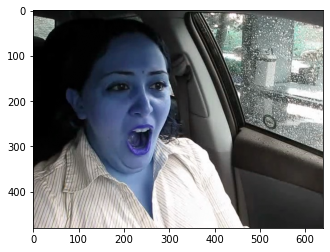

[[0.26860303 0.7045002 ]] 1


In [27]:
prediction = model.predict([prepare("/content/drive/MyDrive/train/yawn/109.jpg")])
print(prediction,np.argmax(prediction))

In [28]:
 model.save("/content/drive/MyDrive/train/drowsiness_only_yawn_sigmoid.h5")
model.save("/content/drive/MyDrive/train/drowsiness_only_yawn_sigmoid.model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/train/drowsiness_only_yawn_sigmoid.model/assets


In [3]:
model = tf.keras.models.load_model("/content/drive/MyDrive/train/drowsiness_only_yawn.h5")

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    print(img.shape)
    img_array = img_array / 255
    ##resized_array = cv2.resize(img_array, (145, 145))
    print(np.argmax(model.predict(image_array.reshape(-1, 145, 145, 3))))
    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

<IPython.core.display.Javascript object>

(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
(480, 640, 3)
1
